In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Print functon for charts
%matplotlib inline

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# sk learn imports ml libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Loading the datasets
df = pd.read_csv("/content/HousingPrices-Amsterdam-August-2021.csv")

In [ ]:
df

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...,...
919,920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  924 non-null    int64  
 1   Address     924 non-null    object 
 2   Zip         924 non-null    object 
 3   Price       920 non-null    float64
 4   Area        924 non-null    int64  
 5   Room        924 non-null    int64  
 6   Lon         924 non-null    float64
 7   Lat         924 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 57.9+ KB


In [ ]:
df.shape

(924, 8)

In [ ]:
df.describe()

,Unnamed: 0,Price,Area,Room,Lon,Lat
count,924.000000,9.200000e+02,924.000000,924.000000,924.000000,924.000000
mean,462.500000,6.220654e+05,95.952381,3.571429,4.888605,52.363326
std,266.880123,5.389942e+05,57.447436,1.592332,0.053140,0.024028
min,1.000000,1.750000e+05,21.000000,1.000000,4.644819,52.291519
25%,231.750000,3.500000e+05,60.750000,3.000000,4.855834,52.352077
50%,462.500000,4.670000e+05,83.000000,3.000000,4.886818,52.364631
75%,693.250000,7.000000e+05,113.000000,4.000000,4.922337,52.377598
max,924.000000,5.950000e+06,623.000000,14.000000,5.029122,52.423805


In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df

,Address,Zip,Price,Area,Room,Lon,Lat
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...
919,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Address'] = encoder.fit_transform(df['Address'])
df.head()

,Address,Zip,Price,Area,Room,Lon,Lat
0,97,1091 CR,685000.0,64,3,4.907736,52.356157
1,450,1059 EL,475000.0,60,3,4.850476,52.348586
2,905,1097 SM,850000.0,109,4,4.944774,52.343782
3,754,1060 TH,580000.0,128,6,4.789928,52.343712
4,898,1036 KN,720000.0,138,5,4.902503,52.410538


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Zip'] = encoder.fit_transform(df['Zip'])
df.head()

,Address,Zip,Price,Area,Room,Lon,Lat
0,97,694,685000.0,64,3,4.907736,52.356157
1,450,421,475000.0,60,3,4.850476,52.348586
2,905,752,850000.0,109,4,4.944774,52.343782
3,754,436,580000.0,128,6,4.789928,52.343712
4,898,257,720000.0,138,5,4.902503,52.410538


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Address  924 non-null    int64  
 1   Zip      924 non-null    int64  
 2   Price    920 non-null    float64
 3   Area     924 non-null    int64  
 4   Room     924 non-null    int64  
 5   Lon      924 non-null    float64
 6   Lat      924 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 50.7 KB


Text(0.5, 1.0, 'Correlation Matrix')

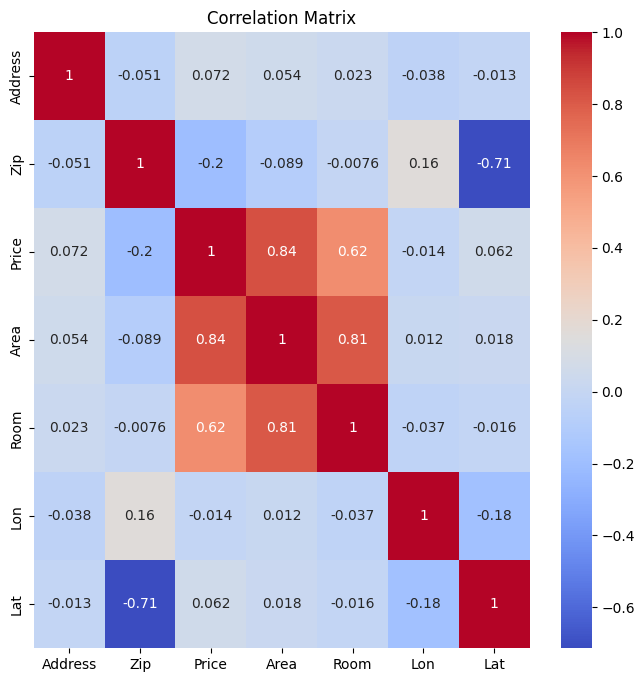

In [ ]:
#Plotting the correlation matrix "Heatmap"

#Setting the figure size for the plot
plt.figure(figsize=(8, 8))

#Creating the heatmap of the correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
#df.corr() calculates the correlation coefficients between numerical features
# annot=True adds the correlation values on the heatmap
#cmap='coolwarm' sets the color palette for the heatmap

#adding title to heatmap
plt.title('Correlation Matrix')

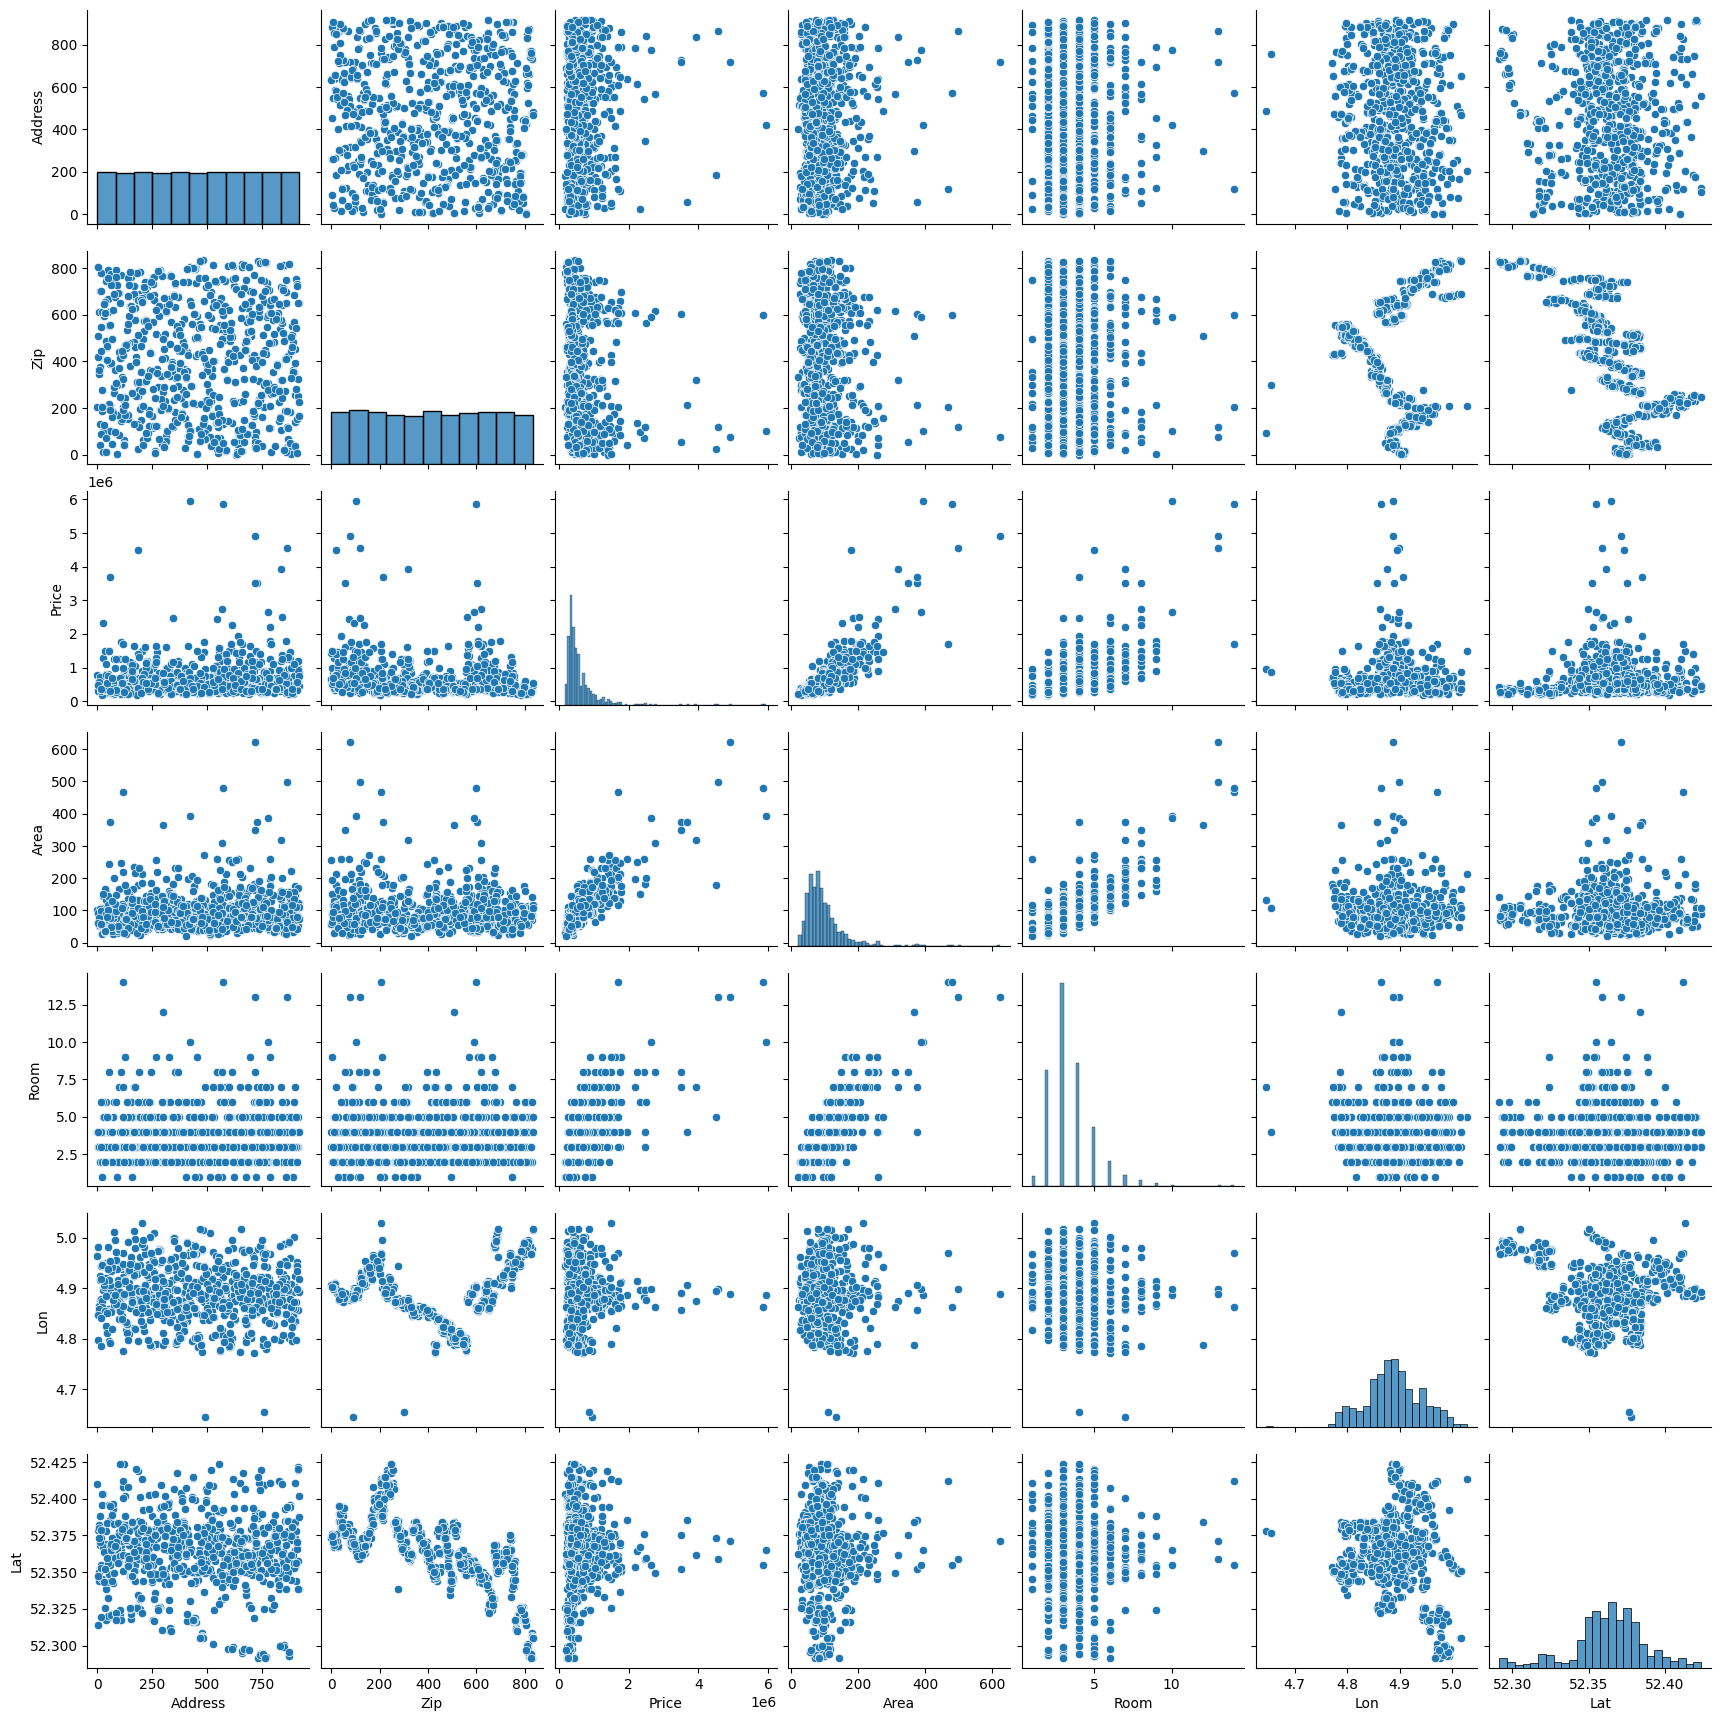

In [ ]:
#Pairpilot to visualize relationships between features

#Creating a pairplot for the entire Dataframe
sns.pairplot(df)
#this will create scatterplots for each pair of features along with histograms for individual features

In [ ]:
X = df.drop('Price', axis=1)
y = df['Price']

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#initialize VIF dataframe
vif_data = pd.DataFrame()
# Selecting only numerical features for VIF calculation
numerical_features = X.select_dtypes(include=np.number).columns
vif_data["feature"] = numerical_features

#calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X[numerical_features].values, i)
                          for i in range(len(numerical_features))]

print(vif_data)

   feature          VIF
0  Address     4.038389
1      Zip     4.212472
2     Area    11.534288
3     Room    18.181672
4      Lon  8750.432726
5      Lat  8724.515671


In [ ]:
X = df.drop(['Lon', 'Lat','Price'], axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#initialize VIF dataframe
vif_data = pd.DataFrame()
# Selecting only numerical features for VIF calculation
numerical_features = X.select_dtypes(include=np.number).columns
vif_data["feature"] = numerical_features

#calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X[numerical_features].values, i)
                          for i in range(len(numerical_features))]

print(vif_data)

   feature        VIF
0  Address   2.990798
1      Zip   2.982953
2     Area  11.405880
3     Room  15.204994


In [ ]:
X = df.drop(['Lon', 'Lat','Price', 'Room'], axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#initialize VIF dataframe
vif_data = pd.DataFrame()
# Selecting only numerical features for VIF calculation
numerical_features = X.select_dtypes(include=np.number).columns
vif_data["feature"] = numerical_features

#calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X[numerical_features].values, i)
                          for i in range(len(numerical_features))]

print(vif_data)

   feature       VIF
0  Address  2.854645
1      Zip  2.519665
2     Area  2.705414


In [ ]:
X.columns

Index(['Address', 'Zip', 'Area'], dtype='object')

<Axes: xlabel='Address', ylabel='Density'>

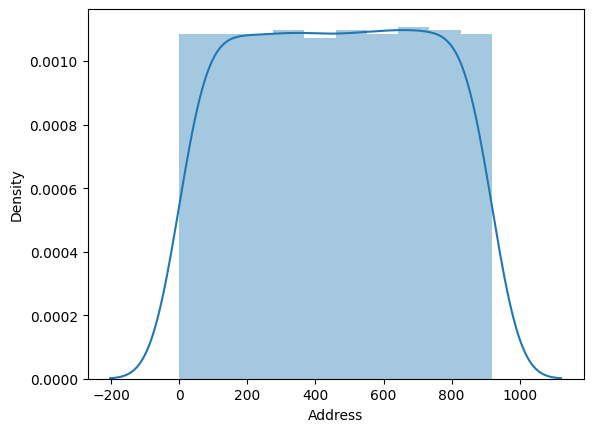

In [ ]:
sns.distplot(df['Address'])

<Axes: xlabel='Zip', ylabel='Density'>

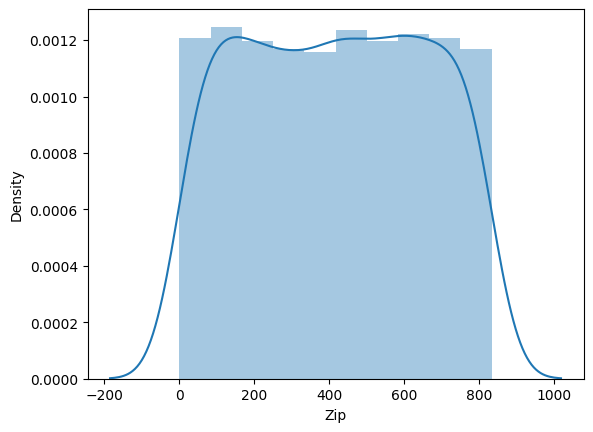

In [ ]:
sns.distplot(df['Zip'])

<Axes: xlabel='Area', ylabel='Density'>

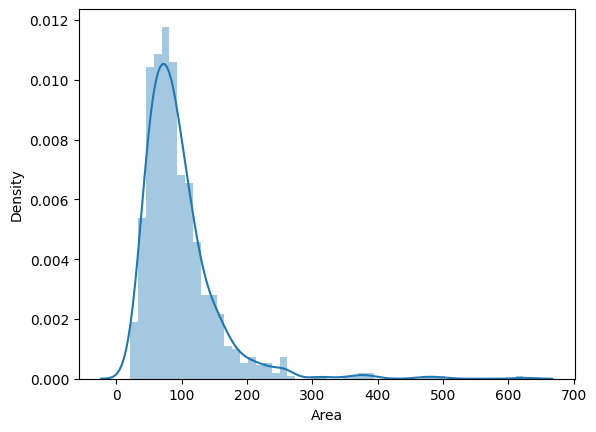

In [ ]:
sns.distplot(df['Area'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Address  924 non-null    int64
 1   Zip      924 non-null    int64
 2   Area     924 non-null    int64
dtypes: int64(3)
memory usage: 21.8 KB


In [ ]:
import pandas as pd

# Assuming y is a pandas Series
print(y.isna().sum())  # This will show the number of NaN values in y

4


In [ ]:
from sklearn.impute import SimpleImputer

# Impute with mean, median, or most frequent
imputer = SimpleImputer(strategy='mean')  # 'mean', 'median', or 'most_frequent'
y_train = imputer.fit_transform(y_train.values.reshape(-1, 1)).flatten()

In [ ]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
score_lr = 100*lr_clf.score(X_test,y_test)
print(f'LR Model score = {score_lr:4.4f}%')
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

LR Model score = 79.7947%
R2 Score :  62.28 %


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred_dtr = dtr.predict(X_test)
R2_score_dtr = round(r2_score(y_pred_dtr,y_test) * 100, 2)

print("R2 Score : ",R2_score_dtr,"%")

R2 Score :  11.9 %


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred_dtr = dtr.predict(X_test)
R2_score_dtr = round(r2_score(y_pred_dtr,y_test) * 100, 2)

print("R2 Score : ",R2_score_dtr,"%")


R2 Score :  26.61 %


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [ ]:
# RandomForestRegressor mean cross-validation
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
cv = cross_val_score(rf, X_train, y_train, cv=5)
print('RandomForestRegressor')
print(mean(cv)*100)

RandomForestRegressor
56.03328363244552


In [ ]:
#GradientBoostingRegressor mean cross-validation
gbr = GradientBoostingRegressor(random_state=1)
gbr.fit(X_train, y_train)
cv = cross_val_score(gbr, X_train, y_train, cv=5)
print('GradientBoostingRegressor')
print(mean(cv)*100)

GradientBoostingRegressor
53.50616840092527
